In [73]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2020-04-13T13:23:24-04:00

CPython 3.8.1
IPython 7.11.1

compiler   : GCC 7.3.0
system     : Linux
release    : 5.3.0-45-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [74]:
import pandas as pd

In [75]:
df = pd.read_csv('boston_dataset.csv')
df.head()

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [76]:
df=  df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})
df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [77]:
df.dtypes

CIUDAD                   object
LON                     float64
LAT                     float64
VALOR_MEDIANO           float64
INDICE_CRIMEN           float64
PCT_ZONA_RESIDENCIAL    float64
PCT_ZONA_INDUSTRIAL     float64
RIO_CHARLES               int64
OXIDO_NITROSO_PPM       float64
N_HABITACIONES_MEDIO    float64
PCT_CASAS_40S           float64
DIS                     float64
DIS_AUTOPISTAS            int64
CARGA_FISCAL              int64
RATIO_PROFESORES        float64
PCT_NEGRA               float64
PCT_CLASE_BAJA          float64
dtype: object

In [78]:
%matplotlib notebook

<IPython.core.display.Javascript object>


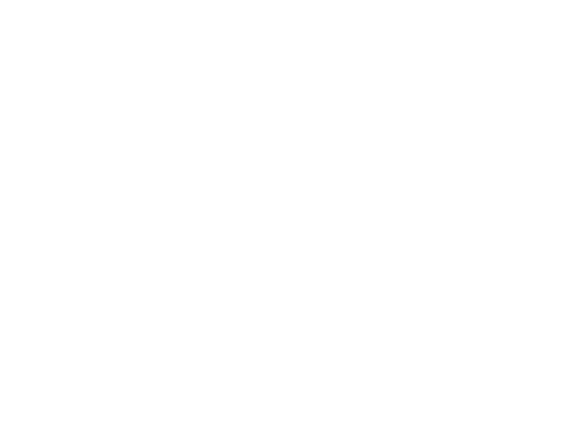

In [79]:
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")


<IPython.core.display.Javascript object>


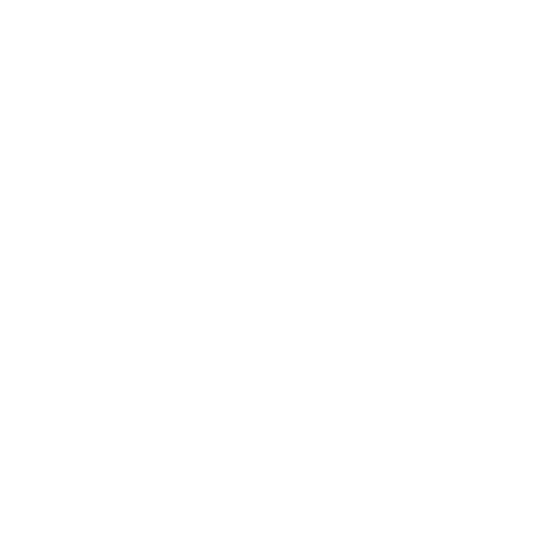

In [80]:
from pandas.plotting import scatter_matrix



sm = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-3,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(0.5,-0.3) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];


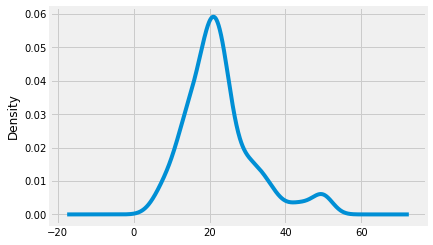

In [81]:
%matplotlib inline
df.VALOR_MEDIANO.plot.kde()

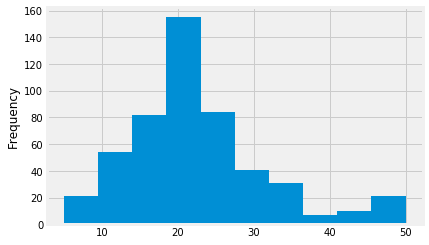

In [82]:
df.VALOR_MEDIANO.plot.hist()

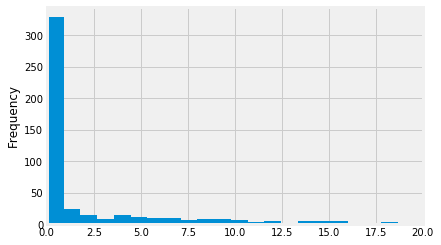

In [83]:
df.INDICE_CRIMEN.plot.hist(xlim=(0,20),bins=100)

In [84]:
valor_por_ciudad = df.groupby('CIUDAD')["VALOR_MEDIANO"].mean()

valor_por_ciudad

CIUDAD
Arlington     25.2000
Ashland       21.4000
Bedford       30.1000
Belmont       36.2000
Beverly       20.8000
               ...   
Weymouth      20.0375
Wilmington    20.1000
Winchester    33.1000
Winthrop      21.5800
Woburn        21.3000
Name: VALOR_MEDIANO, Length: 92, dtype: float64

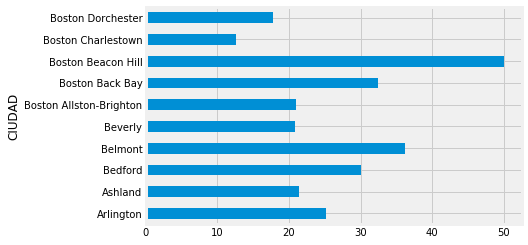

In [85]:
valor_por_ciudad.head(10).plot.barh()

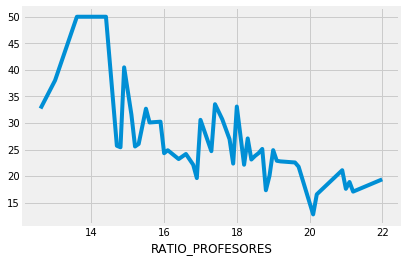

In [86]:
df.groupby("RATIO_PROFESORES").VALOR_MEDIANO.mean().plot.line()

In [87]:
df.RIO_CHARLES.value_counts().plot.pie().ipynb_checkpoints/

SyntaxError: invalid syntax (<ipython-input-87-d38d0795ce7b>, line 1)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO", marker='*',color='pink', figsize=(10,10))
    
plt.title('Relacion entre el Indice de crimen y el valor de las casa')
plt.xlabel('Indice del crimer')
plt.ylabel('Valor de las Viviendas (x10000$)')

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(15,15)

In [ ]:

df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO", marker='*',color='pink')
    
plt.title('Relacion entre el Indice de crimen y el valor de las casa')
plt.xlabel('Indice del crimer')
plt.ylabel('Valor de las Viviendas (x10000$)')

In [ ]:
plt.style.available


In [ ]:
plt.style.use('fivethirtyeight')
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")
    
plt.title('Relacion entre el Indice de crimen y el valor de las casa')
plt.xlabel('Indice del crimer')
plt.ylabel('Valor de las Viviendas (x10000$)')

In [89]:
from ipywidgets import interact

In [94]:
@interact(col1=df.columns.tolist())
def grafico_variable(col1):
    df.plot.scatter(x=col1, y="VALOR_MEDIANO")
    plt.title('{} vs Valor Mediano'.format(col1))

interactive(children=(Dropdown(description='col1', options=('CIUDAD', 'LON', 'LAT', 'VALOR_MEDIANO', 'INDICE_C…

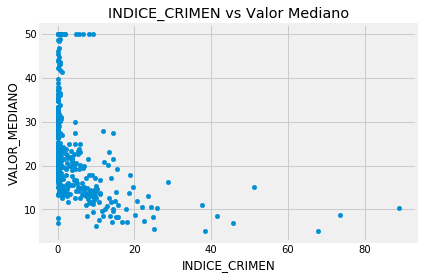

In [92]:
grafico_variable("INDICE_CRIMEN")

In [95]:
#!conda install -y seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jhonattan/anaconda3/envs/DataScience

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |           py38_0         156 KB
    openssl-1.1.1f             |       h7b6447c_0         2.5 MB
    seaborn-0.10.0             |             py_0         163 KB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.0-py_0

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certific

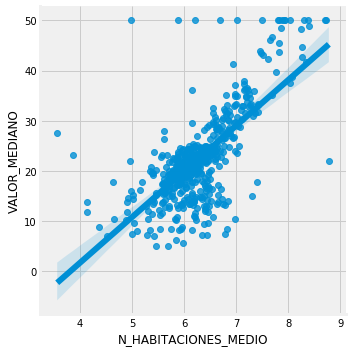

In [100]:
import seaborn as sns
sns.lmplot(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO",data =df)


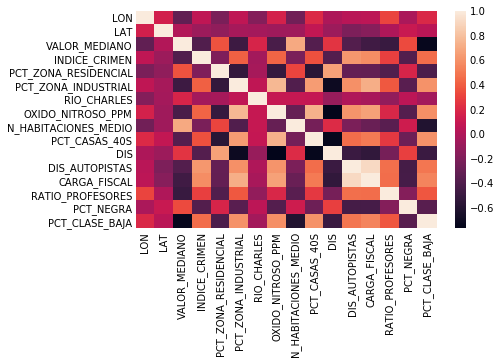

In [101]:
sns.heatmap(df.corr())


In [102]:
#!conda install -y bokeh

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jhonattan/anaconda3/envs/DataScience

  added / updated specs:
    - bokeh


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bokeh-2.0.1                |           py38_0         5.4 MB
    libtiff-4.1.0              |       h2733197_0         447 KB
    olefile-0.46               |             py_0          33 KB
    packaging-20.3             |             py_0          36 KB
    pillow-7.0.0               |   py38hb39fc2d_0         601 KB
    pyyaml-5.3.1               |   py38h7b6447c_0         185 KB
    typing_extensions-3.7.4.1  |           py38_0          40 KB
    ------------------------------------------------------------
 

In [104]:
import bokeh.plotting as bk 
bk.output_notebook()



Loading BokehJS ...

In [105]:
df["CRIMEN_QUINTIL"]=pd.qcut(df.INDICE_CRIMEN,5)

In [114]:
from bokeh.palettes import brewer

colors=brewer['Spectral'][len(df.CRIMEN_QUINTIL.unique())]
df.CRIMEN_QUINTIL.cat.categories

IntervalIndex([(0.00532, 0.0642], (0.0642, 0.15], (0.15, 0.55], (0.55, 5.581], (5.581, 88.976]],
              closed='right',
              dtype='interval[float64]')

In [115]:
p = bk.figure(
plot_width=600,
plot_height=600,
title="Habitaciones vs Valor Vivienda vs Crimen",
)
for i, quintil in enumerate(df.CRIMEN_QUINTIL.cat.categories):
    df_q=df[df.CRIMEN_QUINTIL==quintil]
    p.scatter(df_q.N_HABITACIONES_MEDIO,df_q.VALOR_MEDIANO,color=colors[i],
             legend="({}-{})".format(quintil.left, quintil.right))
    
bk.show(p)

In [116]:
!conda install -c conda-forge -y altair

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jhonattan/anaconda3/envs/DataScience

  added / updated specs:
    - altair


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py38h32f6830_0         151 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    toolz-0.10.0               |             py_0          46 KB  conda-forge
    ------------------------------------------------

In [125]:
from altair import Chart, Color, Scale


In [126]:
chart =Chart(df)
scale= Scale(range=["#edf8fb","#b2e2e2","#66c2a4","#2ca25f","#006d2c"])

chart.mark_point().encode(
x="N_HABITACIONES_MEDIO",
y="VALOR_MEDIANO",
color=Color("CRIMEN_QUINTIL",scale=scale)
)


TypeError: Object of type Interval is not JSON serializable

alt.Chart(...)